In [122]:
import random
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from numpy import random

workload = list(range(1000))
for i in range(len(workload)):
    workload[i] = -1
cache_size = 3
pages = list(range(100))
hot_pages = random.sample(list(range(100)), 10)
nothot_pages = []
for i in range(100):
    if i not in hot_pages:
        nothot_pages.append(i)

hot_positions = random.sample(list(range(1000)), 900)

for pos in hot_positions:
    workload[pos] = random.sample(hot_pages, 1)[0]
for i in range(len(workload)):
    if workload[i] == -1:
        workload[i] = random.sample(nothot_pages, 1)[0]




def fifo_replacement(cache_size):
    cache_content = []
    hit_count = 0
    miss_count = 0
    for page in workload:
        if page in cache_content:
            hit_count += 1
        else:
            miss_count += 1
            if len(cache_content) < cache_size:
                cache_content.append(page)
            else:
                cache_content[0] = page
    hit_rate = hit_count/len(workload)
    return hit_rate

def lru_replacement(cache_size):
    cache_content = []
    lru_list = []
    hit_count = 0
    miss_count = 0
    for page in workload:
        if page in cache_content:
            hit_count += 1
            for i in range(len(lru_list)):
                if lru_list[i] == page:
                    for j in range(0, i):
                        lru_list[j+1] = lru_list[j]
                    lru_list[0] = page
            
        else:
            miss_count += 1
            if len(cache_content) < cache_size:
                cache_content.append(page)
                if len(lru_list) == 0:
                    lru_list.append(page)
                else:
                    lru_list.append(-1)
                    for j in range(len(lru_list)-1):
                        lru_list[j+1] = lru_list[j]
                    lru_list[0] = page
            else:
                for i in range(len(cache_content)):
                    if cache_content[i] == lru_list[len(lru_list) - 1]:
                        cache_content[i] = page
                        break
    hit_rate = hit_count/len(workload)
    return hit_rate

def oracle_replacement(cache_size):
    cache_content = []
    hit_count = 0
    miss_count = 0
    for i in range(len(workload)):
        if workload[i] in cache_content:
            hit_count += 1
        else:
            miss_count += 1
            if len(cache_content) < cache_size:
                cache_content.append(workload[i])
            else:
                farthest = 0
                replace = -1
                for j in range(len(cache_content)):
                    for k in range(i+1, len(workload)):
                        if cache_content[j] == workload[k]:
                            if k > farthest:
                                replace = j
                            break
                cache_content[j] = workload[i]
                
    hit_rate = hit_count/len(workload)
    return hit_rate
    
def r_replacement(cache_size, seed):
    random.seed(seed)
    cache_content = []
    hit_count = 0
    miss_count = 0
    #print("Iteration", "page", "cache_content (after)")
    for iteration, page in enumerate(workload):
        if page in cache_content:
            # Hit!
            #print("Cache hit!")
            hit_count +=1
        else:
            miss_count +=1
            #print("Cache miss!")
            if len(cache_content) < cache_size:
                cache_content.append(page)
            else:
                # Need to evict
                page_evict = random.choice(cache_content)
                #print("Removing {}".format(page_evict))
                cache_content.remove(page_evict)
                cache_content.append(page)
                assert(len(cache_content)==cache_size)
        #print(iteration, page, cache_content)

    #print("Hit count for seed {} is {}".format(seed, hit_count))
    assert(hit_count+miss_count==len(workload))
    hit_rate = hit_count/len(workload)
    return hit_rate

#hit_seed = {}
#for seed in range(1000):
#    hit_seed[seed] = r_replacement(seed)

    
#%pylab inline
#pd.Series(hit_seed).plot(kind='hist')
#plt.xlabel("Hit Rate")
#plt.show()

# Plots of Hit Rate vs. Cache Size

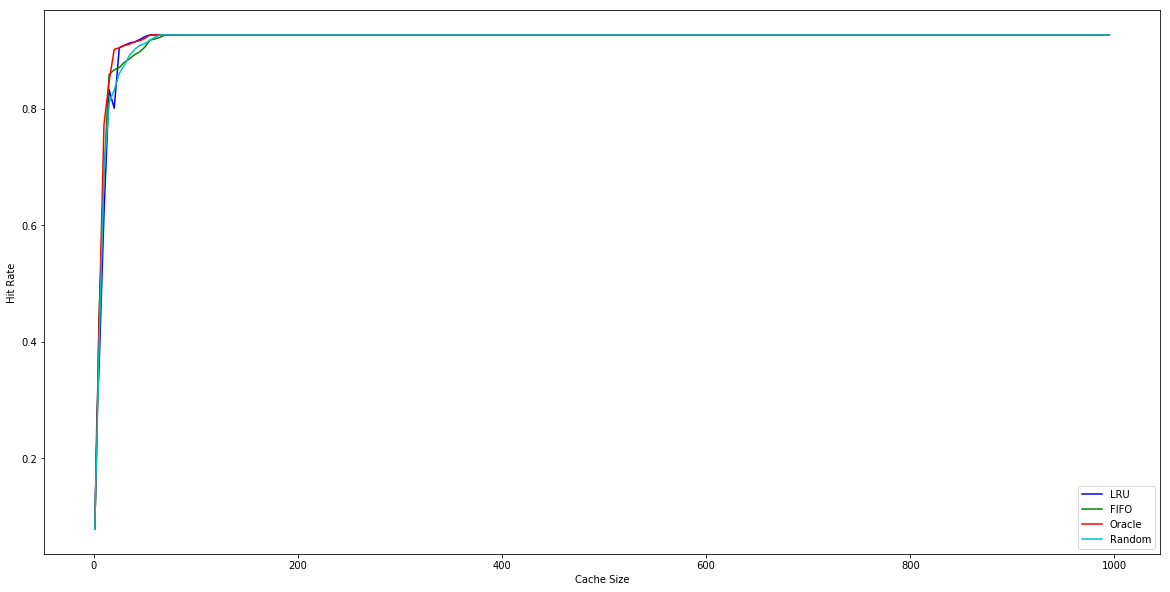

In [125]:
cache_size = [1,2,3]
for i in range(5, 1000, 5):
    cache_size.append(i)
hit_rate_lru = []
hit_rate_oracle = []
hit_rate_fifo = []
hit_rate_random = []
for i in cache_size:
    hit_rate_lru.append(lru_replacement(i))
    hit_rate_oracle.append(oracle_replacement(i))
    hit_rate_fifo.append(fifo_replacement(i))
    hit_rate_random.append(r_replacement(i, 0))
pylab.rcParams['figure.figsize'] = (20, 10)
plt.plot(cache_size, hit_rate_lru, 'b', label = 'LRU')
plt.plot(cache_size, hit_rate_fifo, 'g', label = 'FIFO')
plt.plot(cache_size, hit_rate_oracle, 'r', label = 'Oracle')
plt.plot(cache_size, hit_rate_random, 'c', label = 'Random')
plt.xlabel('Cache Size')
plt.ylabel("Hit Rate")
plt.legend()
plt.show()


In [126]:
page_count = {}
for i in range(len(workload)):
    try:
        page_count[workload[i]] += 1
    except:
        page_count[workload[i]] = 1


# Plot of Cumulative Sum of the "Hot" pages

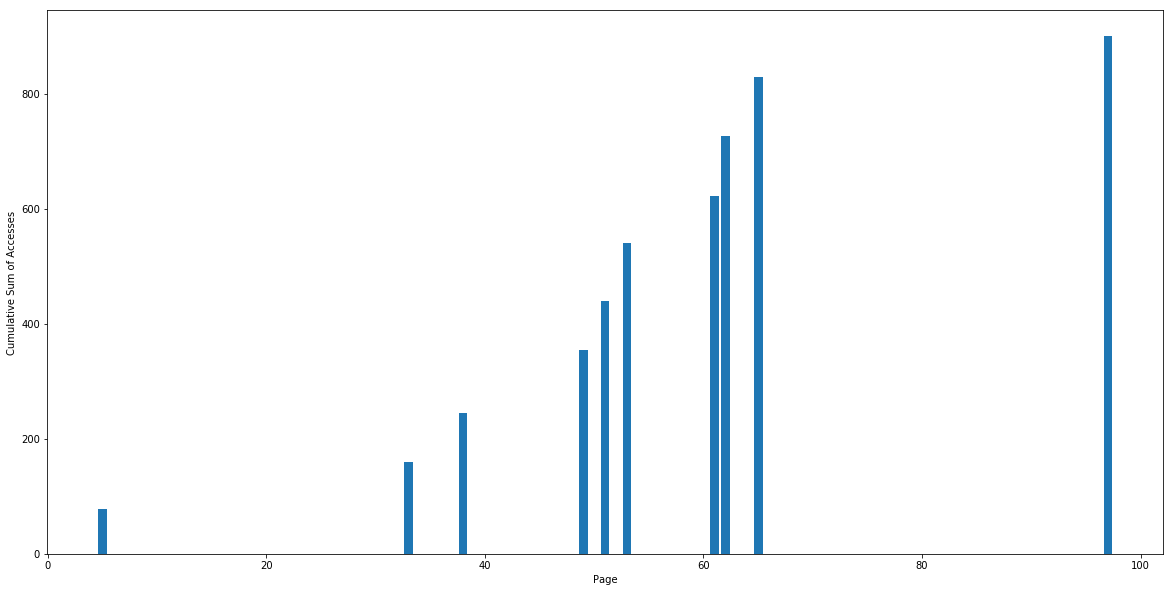

In [127]:
page = list(page_count.keys())
hot_cumsum = []
temp = 0
hot_pages = sort(hot_pages)
for i in hot_pages:
    if i in page:
        temp += page_count[i]
        hot_cumsum.append(temp)
    else:
        hot_cumsum.append(temp)
plt.bar(hot_pages, hot_cumsum)
plt.xlabel('Page')
plt.ylabel('Cumulative Sum of Accesses')
plt.show()
        

# Plot of Cumulative Sum of the "Non-hot" pages

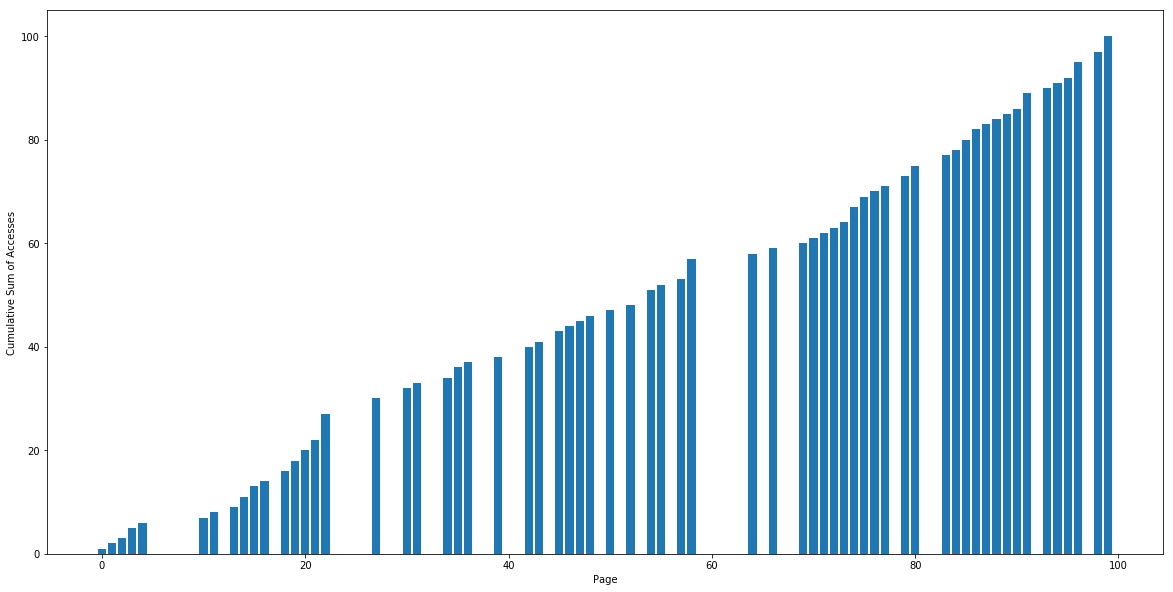

In [128]:
nothot_cumsum = []
temp = 0
nothot_pages = sort(nothot_pages)
for i in nothot_pages:
    if i in page:
        temp += page_count[i]
        nothot_cumsum.append(temp)
    else:
        nothot_cumsum.append(0)
plt.bar(nothot_pages, nothot_cumsum)
plt.xlabel('Page')
plt.ylabel('Cumulative Sum of Accesses')
plt.show()

# Distribution of the number of accesses of pages

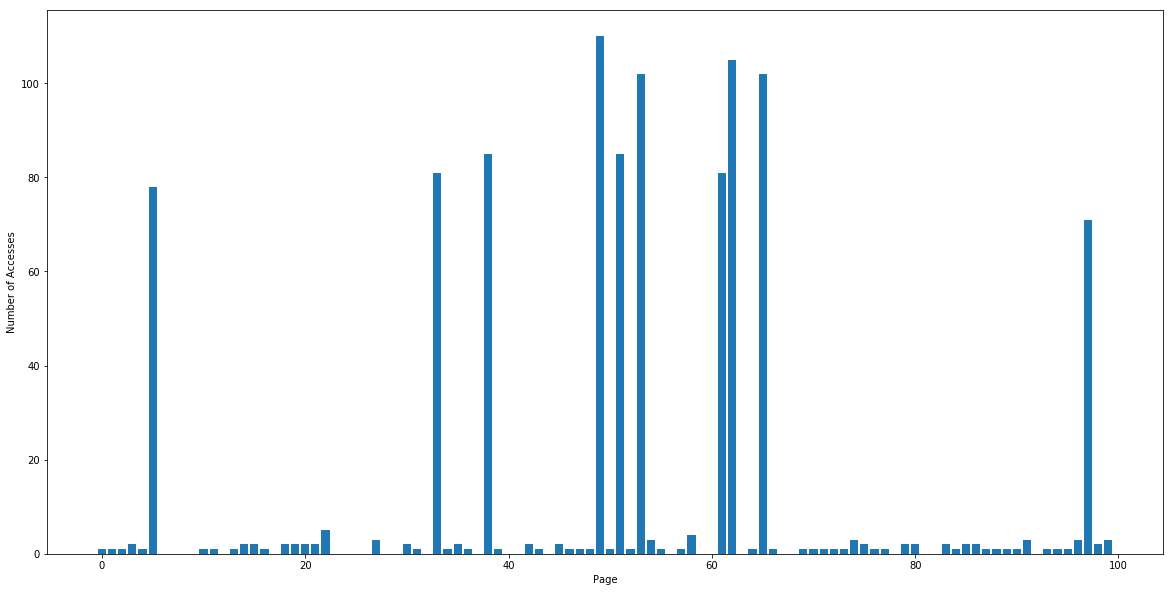

In [129]:
plt.bar(list(page_count.keys()), list(page_count.values()))
plt.xlabel('Page')
plt.ylabel('Number of Accesses')
plt.show()

# Plot of the Mean and the Standard Deviation for Random Replacement

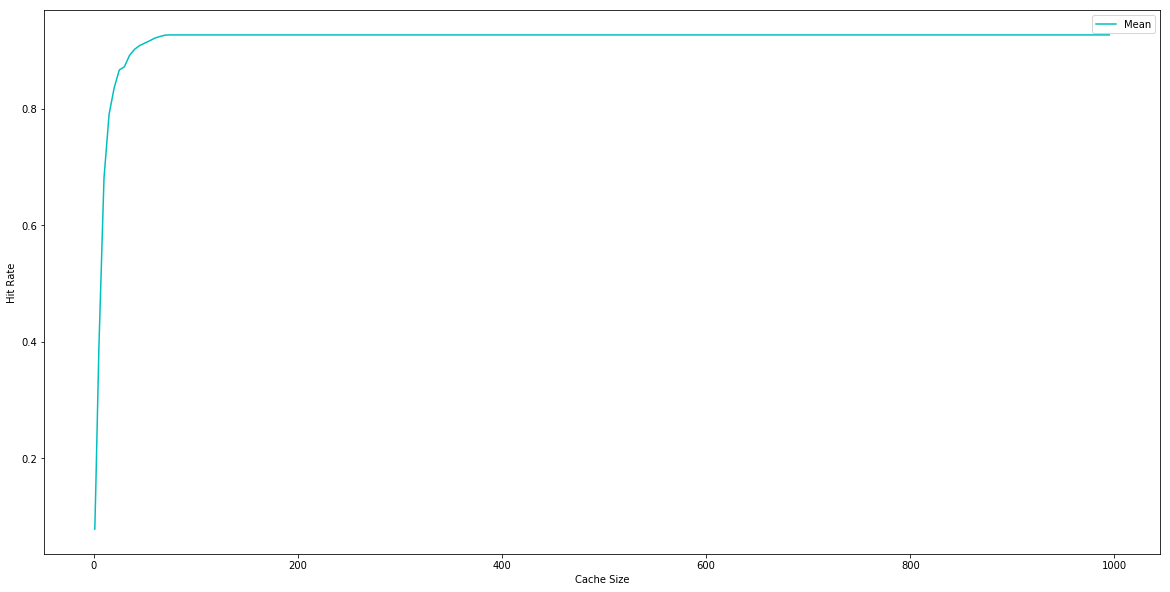

In [131]:
seeds = [1, 0, 3, 4, 10, 25, 100, 24]
hit_rate_r = []
r_std = []
for i in cache_size:
    temp = []
    for seed in seeds:
        temp.append(r_replacement(i, seed))
    
    hit_rate_r.append(np.mean(temp))
    r_std.append(np.std(temp))
pylab.rcParams['figure.figsize'] = (20, 10)
plt.plot(cache_size, hit_rate_r, 'c', label = 'Mean')
plt.xlabel('Cache Size')
plt.ylabel("Hit Rate")
plt.legend()
plt.show()


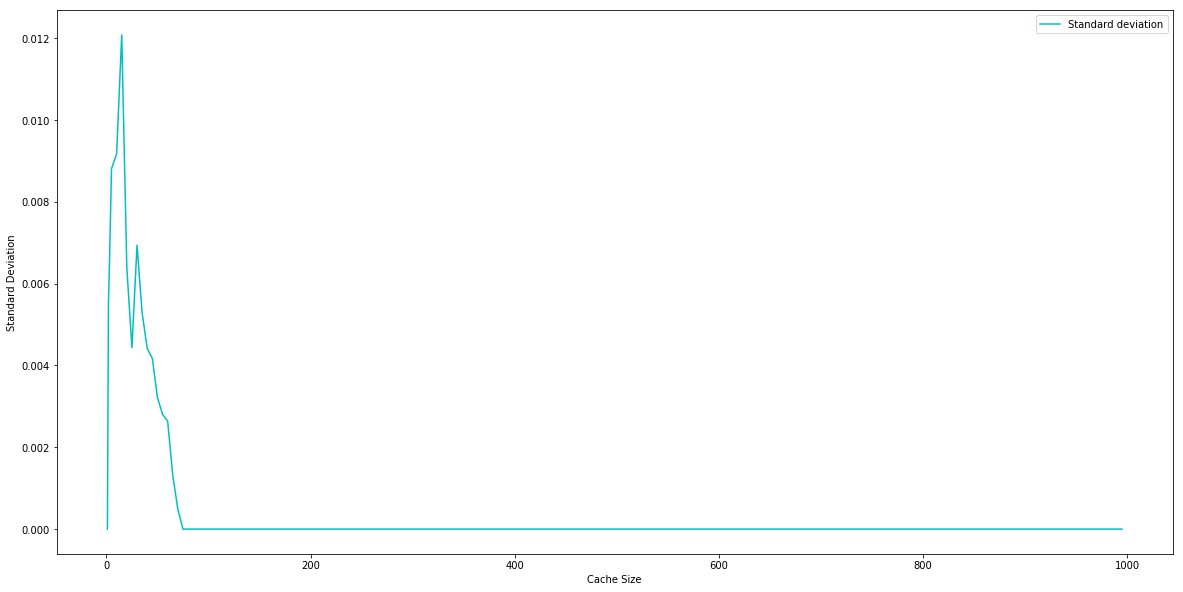

In [133]:
pylab.rcParams['figure.figsize'] = (20, 10)
plt.plot(cache_size, r_std, 'c', label = 'Standard deviation')
plt.xlabel('Cache Size')
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()